In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\HP\Documents\Python Scripts\household_power_consumption\household_power_consumption.txt",sep=';',  low_memory=False,
              na_values=['nan', '?'], parse_dates = {'Datetime': [0 , 1]}, infer_datetime_format=True)

In [2]:
df.set_index('Datetime', inplace=True)

In [3]:
df_daily= df.resample('D').sum()

In [4]:
df_daily['Global_active_power'].fillna(df_daily['Global_active_power'].mean(), inplace=True)

In [5]:
df_daily['Global_reactive_power'].fillna(df_daily['Global_reactive_power'].mean(), inplace=True)
df_daily['Voltage'].fillna(df_daily['Voltage'].mean(), inplace=True)
df_daily['Global_intensity'].fillna(df_daily['Global_intensity'].mean(), inplace=True)
df_daily['Sub_metering_1'].fillna(df_daily['Sub_metering_1'].mean(), inplace=True)
df_daily['Sub_metering_2'].fillna(df_daily['Sub_metering_2'].mean(), inplace=True)
df_daily['Sub_metering_3'].fillna(df_daily['Sub_metering_3'].mean(), inplace=True)

In [6]:
df_daily.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
df_daily.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Datetime'>

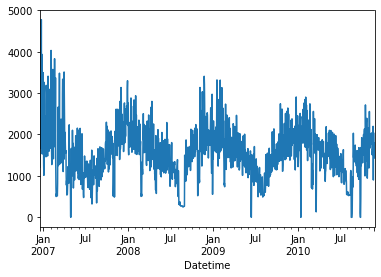

In [9]:
df_daily['Global_active_power'].plot()

In [10]:
GLAP = df['Global_active_power']
GLRP = df['Global_reactive_power']

In [11]:
CORR=GLAP.corr(GLRP).round(2)

In [12]:
CORR

0.25

In [13]:
V = df['Voltage']
GI = df['Global_intensity']

In [14]:
CORR2=V.corr(GI).round(2)

In [15]:
CORR2

-0.41

In [16]:
GLAP = df_daily['Global_active_power']
GLRP = df_daily['Global_reactive_power']

In [17]:
CORR=GLAP.corr(GLRP).round(2)
CORR

0.13

In [18]:
V = df_daily['Voltage']
GI = df_daily['Global_intensity']

In [19]:
CORR=V.corr(GI).round(2)
CORR

0.27

In [20]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [21]:
DF=df_daily.reset_index()
DF.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [22]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Datetime               1442 non-null   datetime64[ns]
 1   Global_active_power    1442 non-null   float64       
 2   Global_reactive_power  1442 non-null   float64       
 3   Voltage                1442 non-null   float64       
 4   Global_intensity       1442 non-null   float64       
 5   Sub_metering_1         1442 non-null   float64       
 6   Sub_metering_2         1442 non-null   float64       
 7   Sub_metering_3         1442 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 90.2 KB


In [23]:
# taking the needed columns
DF = DF[['Datetime','Global_active_power']]

# renaming the column
DF = DF.rename(columns={'Datetime':'ds', 'Global_active_power':'y'})
DF.shape
DF.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [24]:
DF_test = DF[-365:]
DF_test.head()

,ds,y
1077,2009-11-27,1380.026
1078,2009-11-28,1858.950
1079,2009-11-29,1650.962
1080,2009-11-30,1745.190
1081,2009-12-01,1756.378


In [25]:
DF_test.shape

(365, 2)

In [26]:
DF_train = DF[:-365]
DF_train.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [27]:
assert len(DF_train) == (len(df_daily)-365)

In [28]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [29]:
model = Prophet()
model.fit(DF_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\HP\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [30]:
future = model.make_future_dataframe(periods=365, freq='D') 
forecast = model.predict(future) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1632.315186,1812.723814,2961.041965,1632.315186,1632.315186,768.220156,768.220156,768.220156,233.548523,233.548523,233.548523,534.671633,534.671633,534.671633,0.0,0.0,0.0,2400.535342
1,2006-12-17,1632.182272,1796.794014,2963.276725,1632.182272,1632.182272,765.368769,765.368769,765.368769,215.238546,215.238546,215.238546,550.130223,550.130223,550.130223,0.0,0.0,0.0,2397.551041
2,2006-12-18,1632.049359,1491.466486,2597.107799,1632.049359,1632.049359,404.131247,404.131247,404.131247,-162.246259,-162.246259,-162.246259,566.377506,566.377506,566.377506,0.0,0.0,0.0,2036.180606
3,2006-12-19,1631.916445,1565.224683,2763.314443,1631.916445,1631.916445,561.839685,561.839685,561.839685,-21.096175,-21.096175,-21.096175,582.935860,582.935860,582.935860,0.0,0.0,0.0,2193.756130
4,2006-12-20,1631.783531,1622.012761,2808.831973,1631.783531,1631.783531,582.354165,582.354165,582.354165,-16.960243,-16.960243,-16.960243,599.314407,599.314407,599.314407,0.0,0.0,0.0,2214.137696


In [31]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2400.535342,1812.723814,2961.041965,1632.315186,1632.315186,1632.315186
1,2006-12-17,2397.551041,1796.794014,2963.276725,1632.182272,1632.182272,1632.182272
2,2006-12-18,2036.180606,1491.466486,2597.107799,1632.049359,1632.049359,1632.049359
3,2006-12-19,2193.756130,1565.224683,2763.314443,1631.916445,1631.916445,1631.916445
4,2006-12-20,2214.137696,1622.012761,2808.831973,1631.783531,1631.783531,1631.783531
...,...,...,...,...,...,...,...
1437,2010-11-22,2008.112317,1451.990881,2593.755396,1589.662193,1580.707494,1597.728029
1438,2010-11-23,2158.435277,1648.612588,2761.297198,1589.739322,1580.747741,1597.835945
1439,2010-11-24,2167.823491,1573.262680,2743.923047,1589.816451,1580.789753,1597.938060
1440,2010-11-25,1993.601103,1430.458474,2561.695816,1589.893580,1580.832607,1598.043518


In [32]:
def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [33]:
DF_test_val = DF_test['y'] 
pred_val = forecast['yhat'][-365:]

In [34]:
prediction = mape(DF_test_val, pred_val)
print('MAPE prediction: ', round(prediction, 2))

MAPE prediction:  inf


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(DF_test_val, pred_val)
# takes the sqrt of the mse to get the rmse
rmse = np.sqrt(mse)
print('RMSE prediction: ', round(rmse, 2))

RMSE prediction:  441.43


In [36]:
DF2 = df_daily.reset_index()
DF2.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [56]:
DF2 = DF2.rename(columns={'Datetime':'ds', 'Global_active_power':'y', 'Global_reactive_power':'add1', 'Voltage':'add2', 'Global_intensity':'add3', 'Sub_metering_1':'add4', 'Sub_metering_2':'add5', 'Sub_metering_3':'add6'})
DF2.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [57]:
DF2.shape

(1442, 8)

In [58]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1442 non-null   datetime64[ns]
 1   y       1442 non-null   float64       
 2   add1    1442 non-null   float64       
 3   add2    1442 non-null   float64       
 4   add3    1442 non-null   float64       
 5   add4    1442 non-null   float64       
 6   add5    1442 non-null   float64       
 7   add6    1442 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 90.2 KB


In [59]:
DF_test2 = DF2[-365:]
DF2.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [60]:
DF_train2 = DF2[:-365]
DF_train2.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [61]:
assert len(DF_train2) == (len(df_daily)-365)

In [62]:
model2 = Prophet()

In [63]:
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.add_regressor('add4')
model2.add_regressor('add5')
model2.add_regressor('add6')

In [64]:
model2.fit(DF_train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\HP\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [65]:
future_2 = model2.make_future_dataframe(periods=365, freq='D') 
future_2

,ds
0,2006-12-16
1,2006-12-17
2,2006-12-18
3,2006-12-19
4,2006-12-20
...,...
1437,2010-11-22
1438,2010-11-23
1439,2010-11-24
1440,2010-11-25


In [66]:
future_2['add1'] = DF2['add1']
future_2['add2'] = DF2['add2']
future_2['add3'] = DF2['add3']
future_2['add4'] = DF2['add4']
future_2['add5'] = DF2['add5']
future_2['add6'] = DF2['add6']

In [67]:
forecast_2 = model2.predict(future_2) 
forecast_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1549.398603,1226.515652,1258.514183,1549.398603,1549.398603,23.927307,23.927307,23.927307,2.629798,...,0.802552,0.802552,0.802552,16.543715,16.543715,16.543715,0.0,0.0,0.0,1242.566075
1,2006-12-17,1549.469098,3393.735181,3426.039286,1549.469098,1549.469098,-8.852336,-8.852336,-8.852336,-0.015178,...,0.161787,0.161787,0.161787,17.418730,17.418730,17.418730,0.0,0.0,0.0,3409.683925
2,2006-12-18,1549.539593,2180.609874,2214.424569,1549.539593,1549.539593,2.163301,2.163301,2.163301,-0.032467,...,-0.208563,-0.208563,-0.208563,18.240033,18.240033,18.240033,0.0,0.0,0.0,2197.490431
3,2006-12-19,1549.610088,1657.520208,1688.925817,1549.610088,1549.610088,4.024572,4.024572,4.024572,-0.044061,...,-1.537531,-1.537531,-1.537531,18.994510,18.994510,18.994510,0.0,0.0,0.0,1672.880615
4,2006-12-20,1549.680583,2201.650151,2233.312163,1549.680583,1549.680583,2.299508,2.299508,2.299508,-0.048724,...,1.261968,1.261968,1.261968,19.669684,19.669684,19.669684,0.0,0.0,0.0,2217.797770


In [68]:
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,1242.566075,1226.515652,1258.514183,1549.398603,1549.398603,1549.398603
1,2006-12-17,3409.683925,3393.735181,3426.039286,1549.469098,1549.469098,1549.469098
2,2006-12-18,2197.490431,2180.609874,2214.424569,1549.539593,1549.539593,1549.539593
3,2006-12-19,1672.880615,1657.520208,1688.925817,1549.610088,1549.610088,1549.610088
4,2006-12-20,2217.797770,2201.650151,2233.312163,1549.680583,1549.680583,1549.680583
...,...,...,...,...,...,...,...
1437,2010-11-22,2115.725166,1833.658986,2420.727275,1630.583985,1350.572281,1928.016425
1438,2010-11-23,1657.522291,1375.145624,1953.750620,1630.703261,1349.261254,1929.187926
1439,2010-11-24,1864.981839,1580.954998,2163.310094,1630.822537,1348.463687,1930.721341
1440,2010-11-25,1487.298716,1204.792225,1787.604128,1630.941813,1348.623793,1932.059918


In [69]:
DF_test2_val = DF_test2['y']
pred_2 = forecast_2['yhat'][-365:]

In [71]:
PREDICT2 = mape(DF_test2_val, pred_2)
print('MAPE prediction: ', round(PREDICT2, 2))

MAPE prediction:  inf


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
pred_2_mse = mean_squared_error(DF_test2_val, pred_2)
pred_2_rmse = np.sqrt(pred_2_mse)
print('RMSE prediction: ', round(pred_2_rmse, 2))

RMSE prediction:  39.18


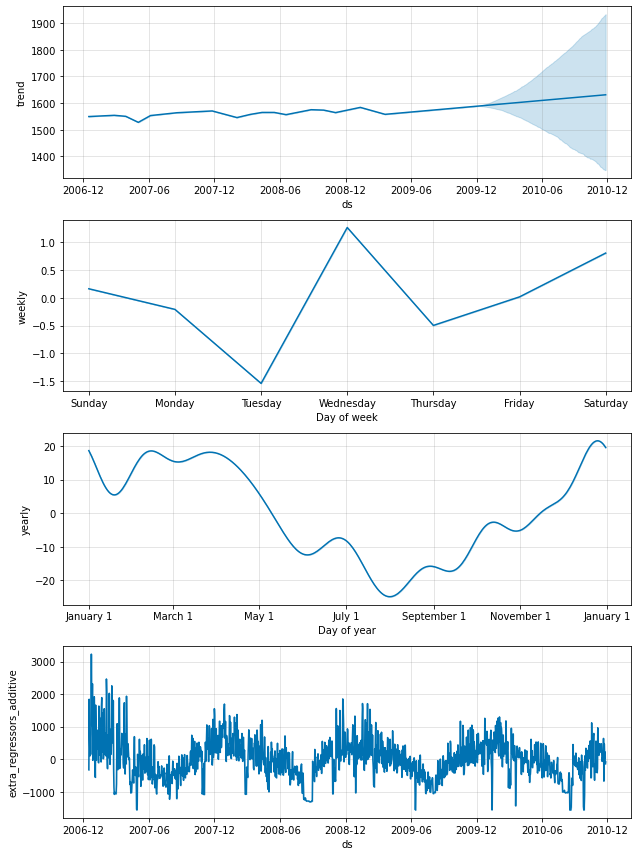

In [74]:
model2.plot_components(forecast_2)
plt.show()